In [158]:
import fsys
import numpy as np
from imtools import MRI
import math

fsys.cd('/Users/colin/Dropbox/__Atlas__/Simulated/')
mri = MRI('mri_small.nii')

In [159]:
mri.info.affine

array([[   2.94985247,    0.        ,    0.        ,  -73.55014801],
       [   0.        ,    2.94985247,    0.        , -108.55014801],
       [   0.        ,    0.        ,    2.94985247,  -69.55014801],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [160]:
x = np.array(mri.info.affine[0][0]*range(mri.data.shape[0])+mri.info.affine[0][3])
y = np.array(mri.info.affine[1][1]*range(mri.data.shape[1])+mri.info.affine[1][3]) 
z = np.array(mri.info.affine[2][2]*range(mri.data.shape[2])+mri.info.affine[2][3])
# 3D
# XX, YY = np.atleast_3d(x, y)
# ZZ = np.atleast_3d(z)
# XX = XX.swapaxes(0,1)
# YY = YY.swapaxes(0,2)
# ZZ = ZZ.swapaxes(1,2)
# 2D
XX, YY, ZZ = np.atleast_2d(x, y, z)
XX = XX
YY = YY.T

In [161]:
mri.data.shape

(52, 54, 64)

In [162]:
print(XX.shape,YY.shape,ZZ.shape)

(1, 52) (54, 1) (1, 64)


In [163]:
theta_xyz = [-10,0,0]
affine_x = np.array([[1, 0, 0, 0], 
                        [0, math.cos(math.radians(theta_xyz[0])), -1.*math.sin(math.radians(theta_xyz[0])), 0], 
                        [0, math.sin(math.radians(theta_xyz[0])), math.cos(math.radians(theta_xyz[0])), 0],
                        [0, 0, 0, 1]])

affine_y = np.array([[math.cos(math.radians(theta_xyz[1])), 0, math.sin(math.radians(theta_xyz[1])), 0], 
                [0, 1, 0, 0], 
                [-1.*math.sin(math.radians(theta_xyz[1])), 0, math.cos(math.radians(theta_xyz[1])), 0], 
                [0, 0, 0, 1]])

affine_z = np.array([[math.cos(math.radians(theta_xyz[2])), -1.*math.sin(math.radians(theta_xyz[2])), 0, 0], 
                        [math.sin(math.radians(theta_xyz[2])), math.cos(math.radians(theta_xyz[2])), 0, 0], 
                        [0, 0, 1, 0], 
                        [0, 0, 0, 1]])
MAT = np.dot(np.dot(affine_x,affine_y),affine_z)
XXX = MAT[0][0]*XX + MAT[0][1]*YY + MAT[0][2]*2.4 + MAT[0][3]
YYY = MAT[1][0]*XX + MAT[1][1]*YY + MAT[1][2]*2.4 + MAT[1][3]
ZZZ = MAT[2][0]*XX + MAT[2][1]*YY + MAT[2][2]*2.4 + MAT[2][3]

In [164]:
print(XXX.shape,YYY.shape,ZZZ.shape)

(54, 52) (54, 52) (54, 52)


In [165]:
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import interpn
from numpy import linspace, zeros, array

# fn = RegularGridInterpolator((x,y,z), mri.data)
# pts = array([XXX.flatten(),YYY.flatten(),ZZZ.flatten()]).T
# V2 = fn(pts)
V2 = interpn((x,y,z), mri.data, array([XXX,YYY,ZZZ]).T,bounds_error=False,fill_value=0)

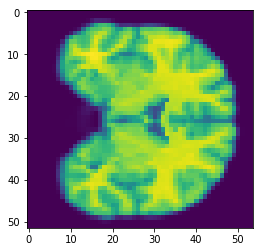

In [166]:
import matplotlib.pyplot as plt
plt.imshow(V2)
plt.show()

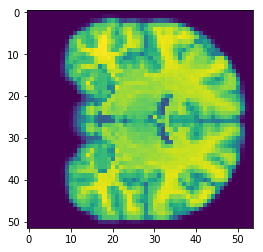

In [149]:
import matplotlib.pyplot as plt
plt.imshow(mri.data[:,:,30])
plt.show()

In [122]:
ZZZ

array([[ 28.94542599,  28.94542599,  28.94542599, ...,  28.94542599,
         28.94542599,  28.94542599],
       [ 28.94542599,  28.94542599,  28.94542599, ...,  28.94542599,
         28.94542599,  28.94542599],
       [ 28.94542599,  28.94542599,  28.94542599, ...,  28.94542599,
         28.94542599,  28.94542599],
       ..., 
       [ 28.94542599,  28.94542599,  28.94542599, ...,  28.94542599,
         28.94542599,  28.94542599],
       [ 28.94542599,  28.94542599,  28.94542599, ...,  28.94542599,
         28.94542599,  28.94542599],
       [ 28.94542599,  28.94542599,  28.94542599, ...,  28.94542599,
         28.94542599,  28.94542599]])

In [150]:
np.exp(2)

7.3890560989306504

In [151]:
np.exp(6.25)

518.01282466834198

In [152]:
np.log(.5) + np.log(.5)

-1.3862943611198906

In [153]:
np.exp(np.log(.5) + np.log(.5))

0.25

In [154]:
np.exp(np.log(.1) + np.log(.1))

0.010000000000000004

In [155]:
np.log(.1) + np.log(.1)

-4.6051701859880909

In [156]:
np.log(.75) + np.log(.75)

-0.5753641449035618

In [157]:
np.exp(np.log(.75) + np.log(.75))

0.5625

In [171]:
warp = np.array([[  0.96584845,  -0.25910756,  0, 84.25178528],
       [  0.25910756,   0.96584845, 0, -18.89277077],
       [ 0, 0, 1, 0],
                [0, 0, 0, 1]])


In [172]:
reg = np.array([[0.737, 0, 0, -94.7045],
 [0, 0.737, 0, -97.6525],
 [0, 0, 0.737, -18.793499999999998],
 [0, 0, 0, 1]]
)

In [173]:
np.dot(warp,reg)

array([[   0.71183031,   -0.19096227,    0.        ,   18.08409175],
       [   0.19096227,    0.71183031,    0.        , -137.74893845],
       [   0.        ,    0.        ,    0.737     ,  -18.7935    ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [174]:
np.dot(reg,warp)

array([[   0.71183031,   -0.19096227,    0.        ,  -32.61093425],
       [   0.19096227,    0.71183031,    0.        , -111.57647206],
       [   0.        ,    0.        ,    0.737     ,  -18.7935    ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [176]:
warp2 = np.array([[  0.99720716,   0.07468485,  0, 31.00733376],
       [ -0.07468485,   0.99720716,  0, -3.19022155],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]]
)
np.dot(warp2,reg)

array([[  7.34941677e-01,   5.50427344e-02,   0.00000000e+00,
         -7.07258340e+01],
       [ -5.50427344e-02,   7.34941677e-01,   0.00000000e+00,
         -9.34970024e+01],
       [  0.00000000e+00,   0.00000000e+00,   7.37000000e-01,
         -1.87935000e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [177]:
np.dot(warp2,reg)

array([[  7.34941677e-01,   5.50427344e-02,   0.00000000e+00,
         -7.07258340e+01],
       [ -5.50427344e-02,   7.34941677e-01,   0.00000000e+00,
         -9.34970024e+01],
       [  0.00000000e+00,   0.00000000e+00,   7.37000000e-01,
         -1.87935000e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]])

In [179]:
np.linalg.inv(warp2)

array([[  0.99720721,  -0.07468485,   0.        , -31.15899811],
       [  0.07468485,   0.99720721,   0.        ,   0.86553375],
       [  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [180]:
warp2

array([[  0.99720716,   0.07468485,   0.        ,  31.00733376],
       [ -0.07468485,   0.99720716,   0.        ,  -3.19022155],
       [  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [181]:
np.linalg.inv(warp)

array([[  0.96584849,   0.25910757,   0.        , -76.47919985],
       [ -0.25910757,   0.96584849,   0.        ,  40.07782964],
       [  0.        ,   0.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [182]:
-76.47919985+ 31.15899811

-45.32020174

In [183]:
40.07782964 - 0.86553375


39.21229589

In [207]:
wapy = np.dot(warp,np.linalg.inv(warp2))

In [210]:
dy, dx, dtheta = wapy[0][3], wapy[1][3], np.arcsin(wapy[0][1]) * 180 / np.pi
print('max: ', dx, dy, dtheta)

max:  -26.1303283155 53.9326489104 -19.3002298103


In [209]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])